## Boston Housing Project
### Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower
sns.set()

### Read and Explore Data

In [58]:
df = pd.read_csv('housing2.csv')

In [59]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Column1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5    RM      506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12   LSTAT   506 non-null    float64
 13  MEDV     506 non-null    float64
 14  Column1  0 non-null      float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [61]:
#Dropping 'Column1' which only has NULLs
df.drop('Column1', axis = 1, inplace = True)

In [62]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [63]:
df_corr = df.corr(numeric_only = True)

<Axes: >

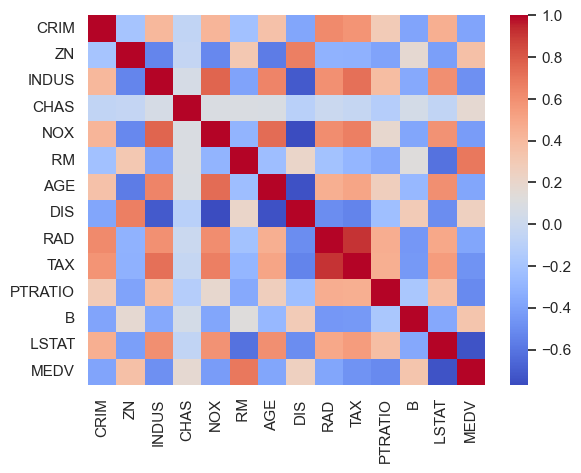

In [64]:
sns.heatmap(df_corr, cmap = 'coolwarm')

### I. Choosing variable RM (Number of Rooms) for analysis

In [65]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', ' RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', ' LSTAT', 'MEDV'],
      dtype='object')

In [66]:
#Rename ' RM' to 'RM'
df.rename(columns = {" RM":"RM"}, inplace = True)

### 1. Mean and Standard Deviation

In [67]:
np.mean(df['RM'])

6.284634387351779

In [68]:
np.std(df['RM'])

0.7019225143345692

### 2. Histogram

<Axes: xlabel='RM', ylabel='Count'>

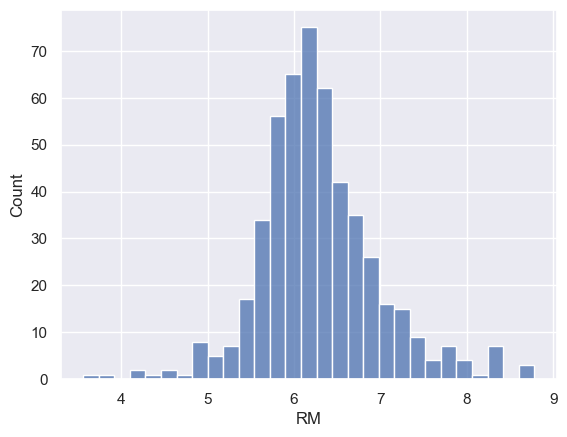

In [69]:
sns.histplot(data = df, x = 'RM')

### 3. Correlation

In [79]:
df['RM'].corr(df['MEDV'])

0.6953599470715395

Number of rooms is strongly positively correlated to Median Price of House.

### 4. Regression

In [71]:
x1 = df['RM']
y = df['MEDV']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.49e-74
Time:                        12:21:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Scatterplot with Regression Line

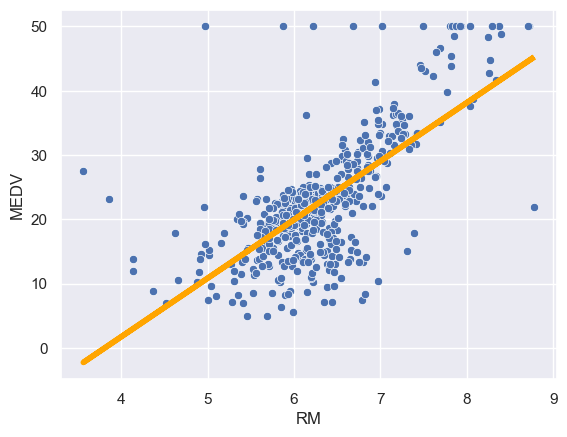

In [72]:
sns.scatterplot(data = df, x = 'RM', y = 'MEDV')
yhat = -34.6707 + x1 * 9.1021
plt.plot(x1, yhat, lw = 4, color = 'orange')

## II. Hypothesis Testing for Charles River Variable

In [73]:
df.groupby('CHAS').mean()['MEDV']

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

### 1. Null Hypothesis
Null Hypothesis: Mean Median Price where tract bounds Charles river is less than or equal to Mean Median Price where tract does not bound river

Mu(CHAS = 1) <= Mu(CHAS = 0)

### 2. P-value

In [74]:
import scipy.stats as stats

In [75]:
withriver = df[df['CHAS'] == 1]['MEDV']
withoutriver = df[df['CHAS'] == 0]['MEDV']

In [76]:
# Two-sample one-tailed t-test
stats.ttest_ind(withriver, withoutriver, equal_var= False, alternative='greater')

TtestResult(statistic=3.113291312794837, pvalue=0.0017835850490687585, df=36.876408797611994)

p-value is 0.00178. We can reject the null hypothesis that median price where tract bounds river is less than or equal to median price without river. 

### 3. Confidence Interval for MEDV with CHAS = 1

In [77]:
stats.t.interval(0.90, len(withriver) - 1, loc = withriver.mean(), scale= stats.sem (withriver))

(25.062586315862973, 31.81741366702934)

### 4. Group Size Calculation

In [78]:
effect_size = 0.6
power = 0.8
alpha = 0.05

analysis = TTestIndPower()
required_n = analysis.solve_power(effect_size = effect_size, alpha = alpha, power = power)
print(required_n)

44.58579025908011


### III. Adding a new feature

Adding a metro line connecting the tracts to Downtown Boston to explore its effect on median house price. 

### Experimental Design Outline:

#### Objective: To determine the effect of adding a metro line on median house prices in Boton's tracts

#### Treatment Group: Tracts with metro stations

#### Control Group: Tracts with no change

#### Randomization: Randomly assign tracts to treatment and control groups

#### Sample Size: Based on the power calculation, each group should have at least 45 tracts.

#### Power: Maintaining the calulcated sample size ensures enough power (0.8) to detect meaningful effect.

#### Analysis:
- Paired t-test: Measure change in median house price before and after the metro line is added
- 2-sample t-test: Measure change in median house price between the two groups

#### Hypothesis testing:
- Null Hypothesis: Adding a metro line has no effect on median house price
- Alternate Hypothesis: Adding a metro line increases the median house price